### Creating dummy variables

Being able to include categorical features in the model building process can enhance performance as they may add information that contributes to prediction accuracy.

The music_df dataset has been preloaded for you, and its shape is printed. Also, pandas has been imported as pd.

Now you will create a new DataFrame containing the original columns of music_df plus dummy variables from the "genre" column

In [60]:
import pandas as pd

music_df = pd.read_csv('..\\datasets\\music_clean2.csv', delimiter=',')
#print(music_df.head())
print("Shape of music_df: {}".format(music_df.shape))

# Create music_dummies
music_dummies = pd.get_dummies(music_df["genre"], drop_first=True) 

music_dummies = pd.concat([music_df["popularity"], music_dummies], axis=1)
#music_dummies = music_dummies.drop("genre", axis=1)

# Print the new DataFrame's shape
print(music_dummies.head())
print("Shape of music_dummies: {}".format(music_dummies.shape))


Shape of music_df: (1000, 13)
   popularity   hard    pop   rock
0        60.0  False  False  False
1        63.0  False   True  False
2        59.0  False  False   True
3        54.0   True  False  False
4        55.0  False   True  False
Shape of music_dummies: (1000, 4)


### Regression with categorical features

Now you have created music_dummies, containing binary features for each song's genre, it's time to build a ridge regression model to predict song popularity.

The model will be evaluated by calculating the average RMSE, but first, you will need to convert the scores for each fold to positive values and take their square root. 

This metric shows the average error of our model's predictions, so it can be compared against the standard deviation of the target value—"popularity".

In [61]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge
import numpy as np

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)
# Create X and y
X = music_dummies.drop("popularity", axis=1).values
y = music_dummies["popularity"].values
print(X.shape)
# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

(1000, 3)
Average RMSE: 14.035887292723963
Standard Deviation of the target array: 14.02156909907019


### Dropping missing data

Over the next three exercises, you are going to tidy the music_df dataset. You will create a pipeline to impute missing values and build a KNN classifier model, then use it to predict whether a song is of the "Rock" genre.

In this exercise specifically, you will drop missing values accounting for less than 5% of the dataset, and convert the "genre" column into a binary feature.

In [62]:
# Print missing values for each column
music_dummies = music_dummies.dropna()
print(music_dummies.isna().sum().sort_values())

popularity    0
hard          0
pop           0
rock          0
dtype: int64


### Pipeline for song genre prediction

Now it's time to build a pipeline. It will contain steps to impute missing values using the mean for each feature and build a KNN model for the classification of song genre.

The modified music_df dataset that you created in the previous exercise has been preloaded for you, along with KNeighborsClassifier and train_test_split.

Having set up the steps of the pipeline in the previous exercise, you will now use it on the music_df dataset to classify the genre of songs. What makes pipelines so incredibly useful is the simple interface that they provide.

X_train, X_test, y_train, and y_test have been preloaded for you, and confusion_matrix has been imported from sklearn.metrics.

In [67]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix
# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer), ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

#X = music_dummies.drop("popularity", axis=1).values
#y = music_dummies["popularity"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 2 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
[52. 78. 46. 55. 55. 38. 68. 38. 34. 61. 34. 57. 32. 50. 21. 47. 61. 53.
 36. 58. 36. 49. 49. 38. 65. 53. 71. 40. 72. 28. 56. 67. 44. 52. 71. 60.
 70.  0. 74. 66. 54. 56. 64. 64. 60. 58. 35. 30. 54. 47. 55. 35. 24. 36.
 56. 60. 44. 53. 55. 54. 68. 54. 50. 50. 26. 65. 50. 53. 59. 24. 57. 67.
 28. 74. 52. 53. 44. 62. 36. 58. 46. 70. 55. 69. 74. 51. 62. 47. 44. 54.
 70. 77. 12. 62. 61. 58. 52. 53. 67. 56. 66. 52. 34. 51. 42. 71. 57. 61.
 66. 38. 69. 21. 25. 51. 73. 52. 63. 54. 47. 51. 28. 59. 39. 53. 50. 27.
 50. 62. 48. 30. 38. 30. 61. 57. 37. 63. 71. 69. 51. 77. 63. 70. 19. 54.
 46. 64. 16. 75. 28. 57. 40. 54. 42. 75. 23. 60. 49. 48. 72. 20. 32. 36.
 46. 56. 49. 56. 62. 56. 55. 51. 54. 60. 74. 26. 33. 55. 62. 68. 44. 33.
 68. 48. 55. 47. 39. 61. 48. 52. 52. 39. 56. 52. 38. 52. 57. 63. 61. 56.
 54. 55.]


### Centering and scaling for regression

In [72]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

0.00013639566491918664


### Centering and scaling for classification

In [71]:
# Build the steps
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

C:\Users\msentissi\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.04875 
 {'logreg__C': 0.05357894736842105}


### Visualizing regression model performance

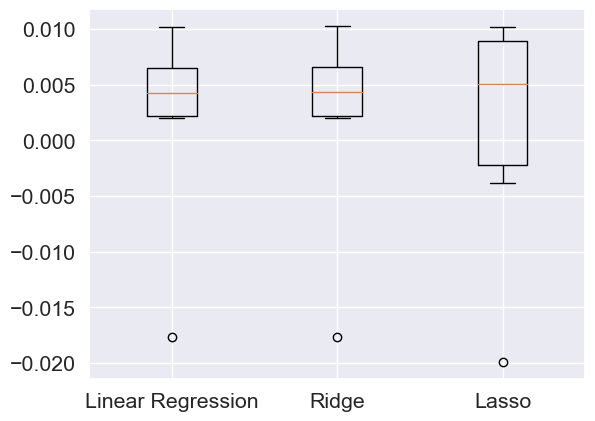

In [74]:
from sklearn.linear_model import LinearRegression

models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)
  
# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

### Predicting on the test set

In [79]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

for name, model in models.items():
  # Fit the model to the training data
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled =  scaler.fit_transform(X_test)
  model.fit(X_train_scaled, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 13.821706171035755
Ridge Test Set RMSE: 13.821679883214395
Lasso Test Set RMSE: 13.806258979538708


### Visualizing classification model performance

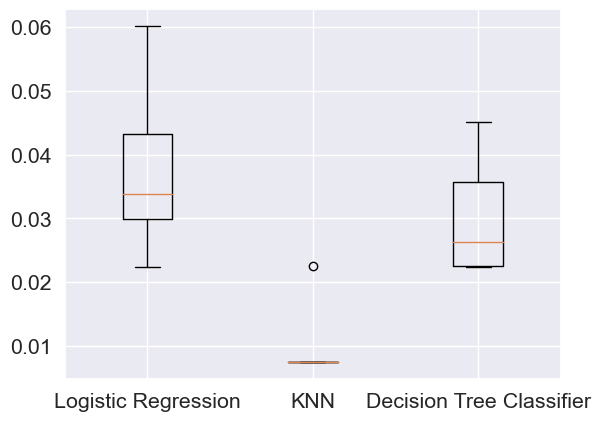

In [81]:
from sklearn.tree import DecisionTreeClassifier

# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

### Pipeline for predicting song popularity

In [82]:
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

C:\Users\msentissi\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\msentissi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Tuned Logistic Regression Parameters: {'logreg__C': 0.112, 'logreg__solver': 'newton-cg'}, Accuracy: 0.03
